In [8]:
%config IPCompleter.greedy=True
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import timeit

## Olympic Dataset

In [11]:

data = pd.read_csv('decathlon.txt', sep="\t")

my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

X = my_data.values

In [13]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

## Applying PCA

In [14]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.32719055 0.1737131 ]
0.5009036561090068


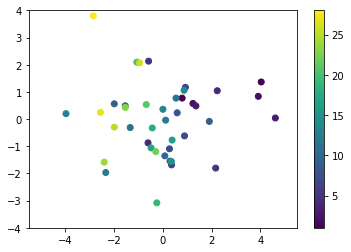

In [17]:
X_projected = pca.transform(X_scaled)

plt.scatter(X_projected[:, 0], X_projected[:, 1],
    c=data.get('Rank'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

(-0.7, 0.7)

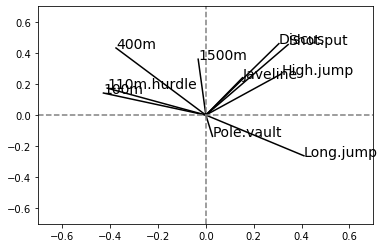

In [18]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data.columns[i], fontsize='14')

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

(2, 10)